# BookCrossing: Working with Book Ratings

![](Data/BookCrossing/BookX.jpg)

## We will be working with the following data:


## Books

### Which includes the fields:

- ISBN                 
- BookTitle            
- BookAuthor            
- YearOfPublication    
- Publisher             
- ImageURLS             
- ImageURLM           
- ImageURLL  


## Users

### Which includes the fields:

- UserID	
- Location	
- Age


## Ratings

### Which includes the fields:

- UserID	
- ISBN	
- BookRating

In [496]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline

## Loading Data

## Books

In [498]:
# Load the Data and take a quick look.

Books = pd.read_csv('Data/BookCrossing/BX-Books.csv',sep=';', error_bad_lines=False)
Books.tail(1)

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [499]:
#Change to Date format
Books.loc[:,'YearOfPublication'] = pd.to_numeric(Books['YearOfPublication'], errors='coerce')

In [500]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
BookTitle            271360 non-null object
BookAuthor           271360 non-null object
YearOfPublication    271357 non-null float64
Publisher            271358 non-null object
ImageURLS            271360 non-null object
ImageURLM            271360 non-null object
ImageURLL            271357 non-null object
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [501]:
Books.describe()

,YearOfPublication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


## Users

In [502]:
Users = pd.read_csv('Data/BookCrossing/BX-Users.csv',sep=';', error_bad_lines=False)
Users.tail()

,UserID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [503]:
Users.describe()

,UserID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Ratings

In [504]:
Ratings = pd.read_csv('Data/BookCrossing/BX-Book-Ratings.csv',sep=';', error_bad_lines=False)
Ratings.tail()

,UserID,ISBN,BookRating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [505]:
Ratings.describe()

,UserID,BookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


## First Book Rating

### Using GroupBy


In [506]:
grouped_Ratings = Ratings.loc[:,['ISBN','BookRating']].groupby('ISBN').\
    agg([np.mean,np.size])#.rename(columns={'mean': 'Rating_Mean', 'size': 'Rating_Size'})

top20 = grouped_Ratings.loc[grouped_Ratings[('BookRating','size')]>10,:].sort_values(('BookRating','mean'),\
        ascending=False).head(20).reset_index()   
top20=top20.assign(AverageRanking=top20[('BookRating','mean')])
top20

ISBN BookRating      AverageRanking
                     mean size               
0   0091842050   9.181818   11       9.181818
1   0316779059   8.461538   13       8.461538
2   0394823370   8.166667   12       8.166667
3   3522128001   8.071429   14       8.071429
4   0615116426   8.066667   15       8.066667
5   0006513220   8.000000   13       8.000000
6   3551551936   8.000000   12       8.000000
7   1844262553   7.962963   54       7.962963
8   0609805363   7.909091   11       7.909091
9   0836213122   7.882353   17       7.882353
10  8478886451   7.875000   16       7.875000
11  3423071516   7.800000   15       7.800000
12  0446610771   7.615385   13       7.615385
13  8826703132   7.555556   27       7.555556
14  1577780728   7.533333   15       7.533333
15  8445071416   7.478261   23       7.478261
16  0684847817   7.454545   11       7.454545
17  0452279623   7.363636   11       7.363636
18  074754624X   7.363636   11       7.363636
19  0394800796   7.307692   13       7.307692

## Using Merge to be able to obtain Rating with Titles instead of ISBN

In [507]:
Top20_Titles = pd.merge(top20,Books,how='left',on='ISBN').ix[:,[0,4,5,6,7]]
Top20_Titles.columns = ['ISBN', 'Ranking', 'BookTitle', 'BookAuthor', 'YearOfPublication']
Top20_Titles.head(1)

,ISBN,Ranking,BookTitle,BookAuthor,YearOfPublication
0,0091842050,9.181818,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,0.0


### Top20: Bar Plot

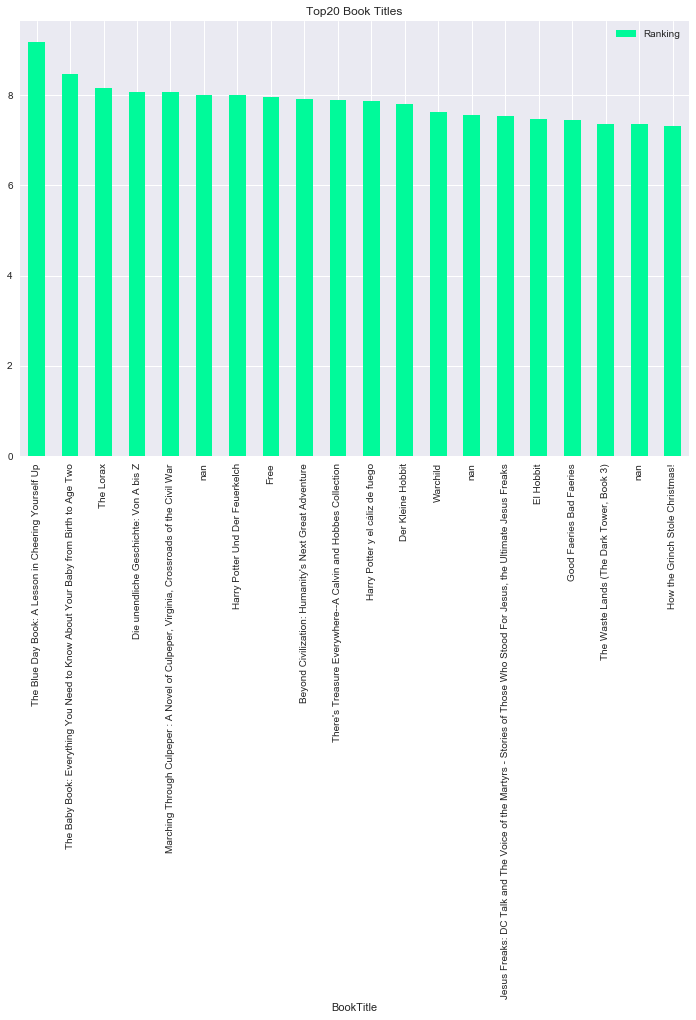

In [508]:
Top20_Titles.plot(x = 'BookTitle', y='Ranking', kind='bar',rot=90,figsize=(12,8), title='Top20 Book Titles',color='mediumspringgreen');

## Merging Books with Ratings 

In [509]:
Titles_with_Ratings = pd.merge(Books,Ratings,how='left',on='ISBN')
Titles_with_Ratings
grouped = Titles_with_Ratings.loc[:,['BookAuthor','BookRating']].groupby('BookAuthor').\
    agg([np.mean,np.size])
top20 = grouped.loc[grouped[('BookRating','size')]>50,:].sort_values(('BookRating','mean'), ascending=False).head(20)    
top20

BookRating        
                               mean    size
BookAuthor                                 
Paul Vincent               7.945455    55.0
Clamp                      6.513333   150.0
Rumiko Takahashi           6.445783    83.0
Joanne K. Rowling          6.278689    61.0
Bill Amend                 6.264151    53.0
Harlan Ellison             6.134021    97.0
Shel Silverstein           6.105820   189.0
G. B. Trudeau              5.932203    59.0
Robert N. Munsch           5.882353    51.0
Federico Garcia Lorca      5.875000    56.0
Garth Ennis                5.614286    70.0
Bill Watterson             5.561818   550.0
Antoine de Saint-Exupéry   5.553957   278.0
Herge                      5.519737   152.0
HUNTER S. THOMPSON         5.453125    64.0
Jane Belk Moncure          5.441176    68.0
Bradley Trevor Greive      5.431655   139.0
J. K. Rowling              5.385832  2909.0
Nick Bantock               5.292593   270.0
Mary Engelbreit            5.252874    88.0

### How to view information in one specific group

In [510]:
## Obtaining one specific group
grouped = Titles_with_Ratings.loc[:,['BookAuthor','BookTitle','BookRating']].groupby('BookAuthor')
grouped.get_group('Joanne K. Rowling')


,BookAuthor,BookTitle,BookRating
449467,Joanne K. Rowling,"Harry Potter, tome 3 : Harry Potter et le Pris...",0.0
449468,Joanne K. Rowling,"Harry Potter, tome 3 : Harry Potter et le Pris...",10.0
498388,Joanne K. Rowling,Harry Potter und der Stein der Weisen,10.0
498389,Joanne K. Rowling,Harry Potter und der Stein der Weisen,8.0
498390,Joanne K. Rowling,Harry Potter und der Stein der Weisen,6.0
498391,Joanne K. Rowling,Harry Potter und der Stein der Weisen,10.0
498392,Joanne K. Rowling,Harry Potter und der Stein der Weisen,0.0
498393,Joanne K. Rowling,Harry Potter und der Stein der Weisen,0.0
498394,Joanne K. Rowling,Harry Potter und der Stein der Weisen,8.0
498395,Joanne K. Rowling,Harry Potter und der Stein der Weisen,10.0


## Groups of groups

In [511]:
# Grouping by Book Title inside J.K.Rowling's group
Books_JKR=grouped.get_group('Joanne K. Rowling').groupby('BookTitle').mean()
JKR_Top= Books_JKR.sort_values('BookRating', ascending=False).head(20)    
JKR_Top.head()

,BookRating
BookTitle,
Harry Potter Und Der Feuerkelch,8.000000
"Harry Potter, tome 1 : Harry Potter �? l'�?©cole des sorciers",7.500000
Harry Potter und der Gefangene von Askaban. Sonderausgabe. 11 CDs. Vollständige Lesung,7.000000
Harry Potter und die Kammer des Schreckens,6.733333
Harry Potter und der Stein der Weisen,6.142857


## Area Plot

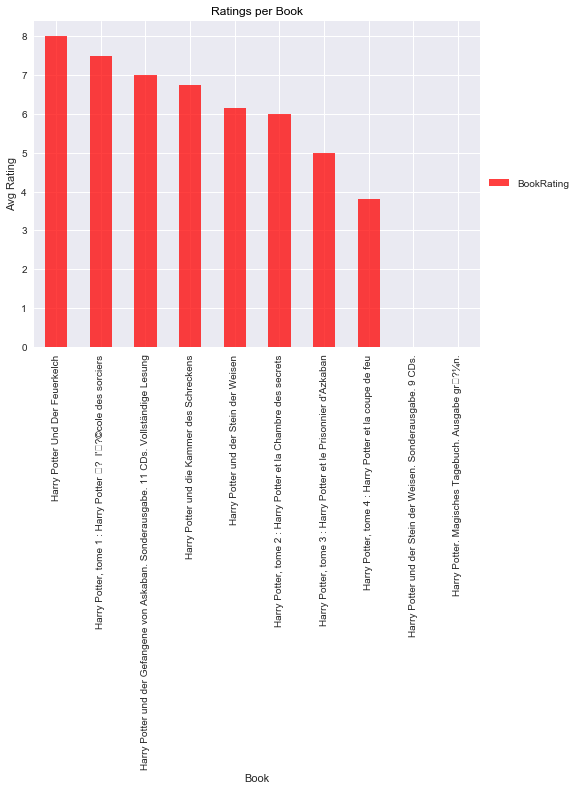

In [512]:
#Area plot with the different Books Ratings. Does it make sence to use Area Plot for this? 

f = plt.figure()

plt.title ('Ratings per Book',color='black')

ax = JKR_Top.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, ax=f.gca(), color='red')
handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[::-1], labels[::-1], loc='center left',bbox_to_anchor=(1.0,0.5))

ax.set_ylabel('Avg Rating')
ax.set_xlabel('Book')
plt.show()

## Bar Plot

Stephen King                 10055
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4778
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2909
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Anita Shreve                  2434
Agatha Christie               2345
Maeve Binchy                  2267
Dan Brown                     2228
Barbara Kingsolver            2216
Catherine Coulter             2209
Robin Cook                    2102
Robert Ludlum                 2069
Lilian Jackson Braun

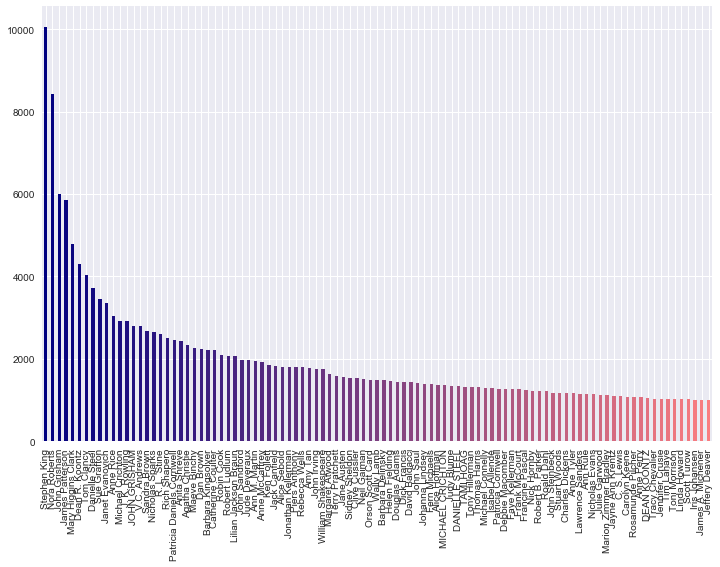

In [513]:
Writers_bar = Titles_with_Ratings['BookAuthor'].value_counts()
print Writers_bar
Writers_bar = Writers_bar[Writers_bar > 1000]

my_colors = [(x/100.0, x/200.0, 0.5) for x in range(len(Writers_bar))]

Writers_bar.plot(kind='bar',rot=90,figsize=(12,8),color=my_colors);

## Scatter Plot

In [514]:
Titles_with_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 10 columns):
ISBN                 1032345 non-null object
BookTitle            1032345 non-null object
BookAuthor           1032345 non-null object
YearOfPublication    1032341 non-null float64
Publisher            1032343 non-null object
ImageURLS            1032345 non-null object
ImageURLM            1032345 non-null object
ImageURLL            1032341 non-null object
UserID               1031136 non-null float64
BookRating           1031136 non-null float64
dtypes: float64(3), object(7)
memory usage: 86.6+ MB


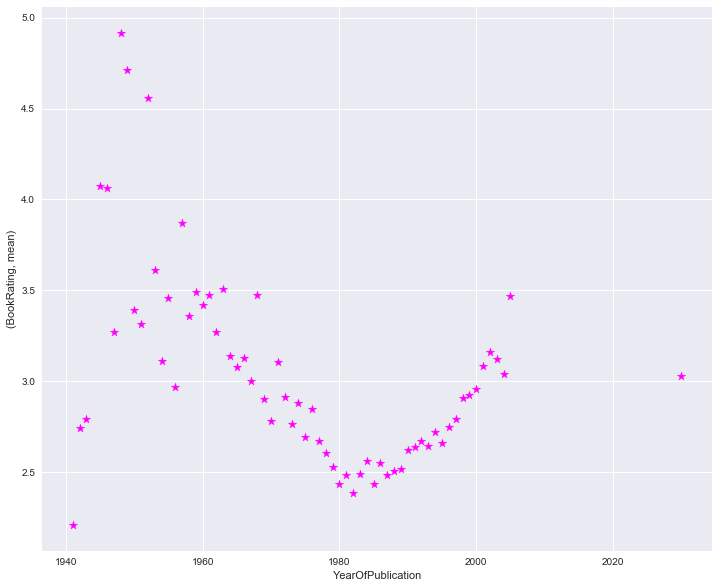

In [515]:
#We use Scatter Plot to study the relationship between two variables (columns)
RatingbyYear = Titles_with_Ratings.loc[Titles_with_Ratings['YearOfPublication']>1940].groupby('YearOfPublication').agg([np.mean,np.size])
RatingbyYear.head()
Year_Rating = RatingbyYear.loc[RatingbyYear[('BookRating','size')]>10,:].sort_values(('BookRating','mean'), ascending=False) 
my_colors = [(0.9,0.1,0.9)]
Year_Rating.reset_index().plot.scatter('YearOfPublication',('BookRating','mean'),alpha=1,s=80,marker='*',figsize=(12,10),color='magenta');

## Line plot

In [516]:
Titles_with_Ratings.head(1)

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL,UserID,BookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0


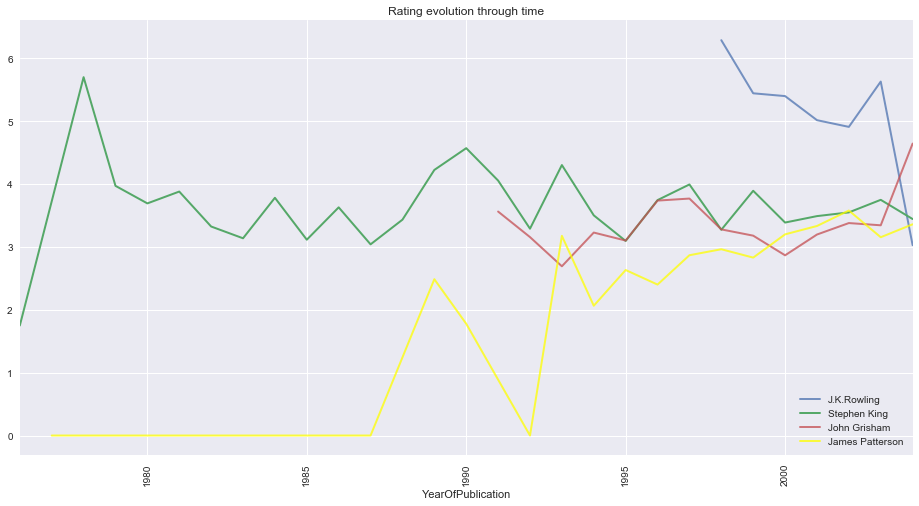

In [517]:
# We will use a Line Plot to show the Average Rating for each of the 4 Writers, and be able to compare them with each other.
plt.figure()

Titles_with_Ratings.loc[(Titles_with_Ratings['YearOfPublication']>1975) & (Titles_with_Ratings.BookAuthor.str.contains('Rowling')),['BookAuthor','BookRating','YearOfPublication']].groupby('YearOfPublication')\
                .mean().loc[:,'BookRating']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='J.K.Rowling',title='Rating evolution through time');
    
Titles_with_Ratings.loc[(Titles_with_Ratings['YearOfPublication']>1975) & (Titles_with_Ratings.BookAuthor.str.contains('Stephen King')),['BookAuthor','BookRating','YearOfPublication']].groupby('YearOfPublication')\
                .mean().loc[:,'BookRating']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=1,label='Stephen King');

Titles_with_Ratings.loc[(Titles_with_Ratings['YearOfPublication']>1975) & (Titles_with_Ratings.BookAuthor.str.contains('John Grisham')),['BookAuthor','BookRating','YearOfPublication']].groupby('YearOfPublication')\
                .mean().loc[:,'BookRating']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='John Grisham');
        
Titles_with_Ratings.loc[(Titles_with_Ratings['YearOfPublication']>1975) & (Titles_with_Ratings.BookAuthor.str.contains('James Patterson')),['BookAuthor','BookRating','YearOfPublication']].groupby('YearOfPublication')\
                .mean().loc[:,'BookRating']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='James Patterson',color='yellow');
    
plt.legend();


## Area Plot

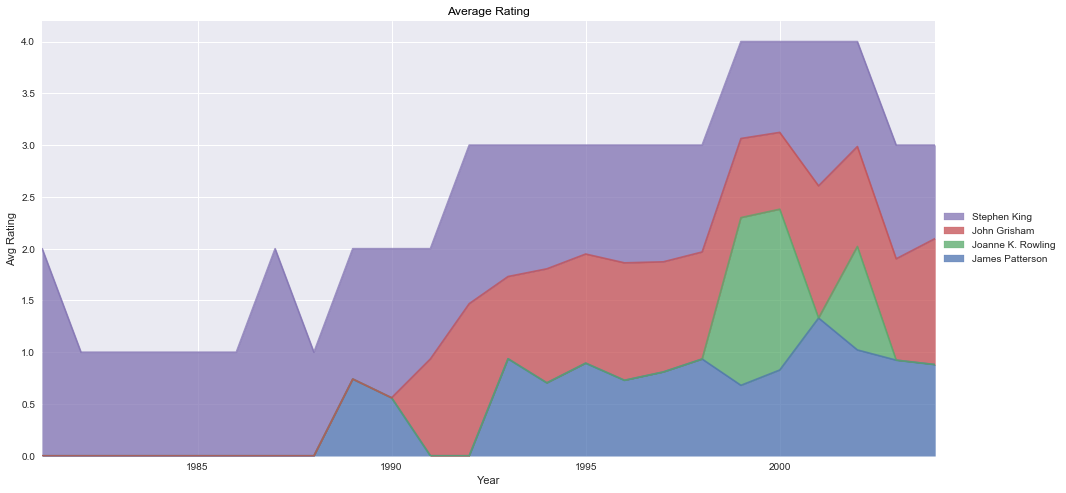

In [518]:
#Stacked Area plots let us see the total of all components. 

RatingbyYear = Titles_with_Ratings.loc[(Titles_with_Ratings['YearOfPublication']>1980) & \
                                       ((Titles_with_Ratings.BookAuthor.str.contains('Joanne K. Rowling')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('John Grisham')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('Stephen King')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('James Patterson')))]\
                                    .groupby(['BookAuthor', 'YearOfPublication']).mean()
    
RatingbyYear.drop('UserID', axis=1, inplace=True)

RatingbyYear.columns = ['num']
RatingbyYear.reset_index(inplace=True)

pivoted = pd.pivot_table(RatingbyYear,values='num',columns='BookAuthor',index='YearOfPublication')
pivoted = pivoted.divide(pivoted.mean(axis=1),axis=0)

f = plt.figure()

plt.title ('Average Rating',color='black')

ax = pivoted.plot(kind='area', stacked=True, figsize=(16,8) ,alpha=0.75, ax=f.gca())
handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[::-1], labels[::-1], loc='center left',bbox_to_anchor=(1.0,0.5))

ax.set_ylabel('Avg Rating')
ax.set_xlabel('Year')
#ax.set_ylim(0,1)
plt.show()

## Age distribution using Bar Plot

In [519]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
UserID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


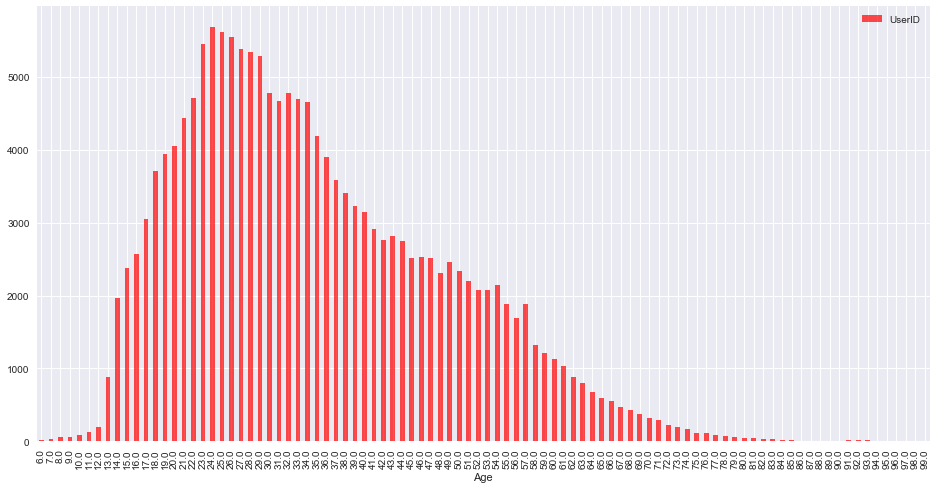

In [520]:
User_Ages = Users.loc[(Users.Age > 5) & (Users.Age < 100),['UserID','Age']].groupby('Age').count()
User_Ages.plot(kind='bar',rot=90,figsize=(16,8),alpha=0.7,color='red');


## Age distribution using Histogram

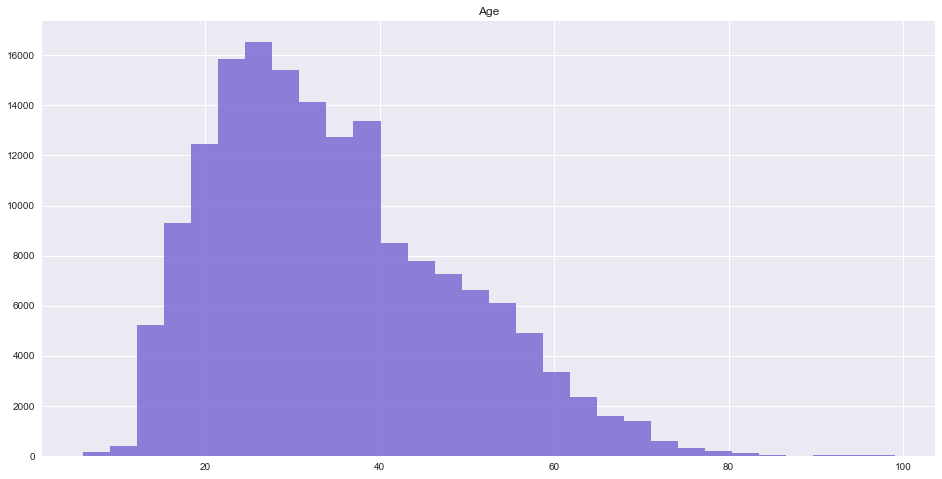

In [521]:
Users.loc[(Users.Age > 5) & (Users.Age < 100),['Age']].hist(color='slateblue', alpha=0.75, figsize=(16,8), bins=30);

## How does it look like if we use Pie chart?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000E08689E8>], dtype=object)

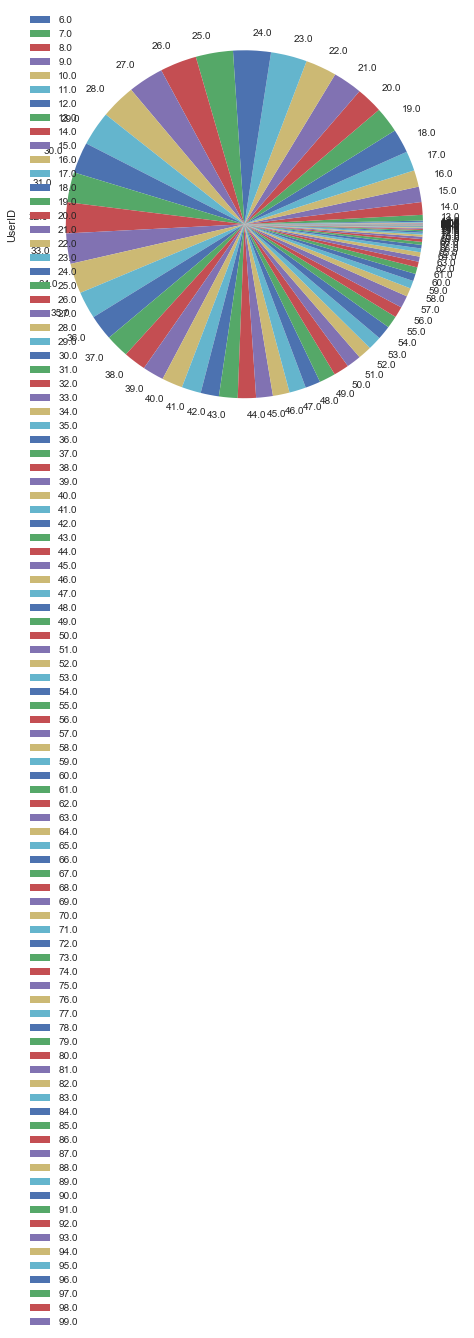

In [522]:
User_Ages.plot.pie(subplots=True, figsize=(8, 8))

## Box Plot with the Ratings of the 4 selected Authors

In [523]:
#We will use Box Plot to study a variable behaviour (Min, Max, Mean, 25% 75%)

Titles_Selected_Authors = Titles_with_Ratings.loc[((Titles_with_Ratings['YearOfPublication']>1980) & \
                                       ((Titles_with_Ratings.BookAuthor.str.contains('Joanne K. Rowling')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('John Grisham')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('Stephen King')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('James Patterson')))),\
                                        ['BookAuthor','BookRating','YearOfPublication']].\
                                        pivot_table(index='YearOfPublication',columns='BookAuthor')
Titles_Selected_Authors



BookRating                                            
BookAuthor        James Patterson Joanne K. Rowling John Grisham Stephen King
YearOfPublication                                                            
1981.0                   0.000000               NaN          NaN     3.880435
1982.0                        NaN               NaN          NaN     3.324675
1983.0                        NaN               NaN          NaN     3.137441
1984.0                        NaN               NaN          NaN     3.781457
1985.0                        NaN               NaN          NaN     3.114625
1986.0                        NaN               NaN          NaN     3.629344
1987.0                   0.000000               NaN          NaN     3.041026
1988.0                        NaN               NaN          NaN     3.433333
1989.0                   2.486486               NaN          NaN     4.224490
1990.0                   1.777778               NaN          NaN     4.570755
1991.0                        NaN               NaN     3.562500     4.055402
1992.0                   0.000000               NaN     3.156250     3.289941
1993.0                   3.176101               NaN     2.692078     4.302013
1994.0                   2.064516               NaN     3.228346     3.502257
1995.0                   2.632716               NaN     3.101392     3.094955
1996.0                   2.400922               NaN     3.736842     3.744538
1997.0                   2.867925               NaN     3.769231     3.993367
1998.0                   2.963235               NaN     3.278788     3.272727
1999.0                   2.830022          6.736842     3.179104     3.892779
2000.0                   3.200000          6.000000     2.866511     3.387681
2001.0                   3.332918          0.000000     3.197080     3.490054
2002.0                   3.578904          3.500000     3.379412     3.549192
2003.0                   3.154197               NaN     3.344059     3.749064
2004.0                   3.359833               NaN     4.643478     3.443609

In [524]:
Titles_Selected_Authors.columns = Titles_Selected_Authors.columns.droplevel() #Run only once
meds = Titles_Selected_Authors.median()
meds.sort(ascending=False)
Titles_Selected_Authors = Titles_Selected_Authors[meds.index]

C:\Users\ngolmar\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


In [525]:
meds

BookAuthor
Joanne K. Rowling    4.750000
Stephen King         3.525725
John Grisham         3.253567
James Patterson      2.830022
dtype: float64

In [526]:
Media_Rating=Titles_with_Ratings.loc[((Titles_with_Ratings['YearOfPublication']>1980) & \
                                       ((Titles_with_Ratings.BookAuthor.str.contains('Joanne K. Rowling')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('John Grisham')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('Stephen King')) | \
                                        (Titles_with_Ratings.BookAuthor.str.contains('James Patterson')))),\
                                        ['BookRating']].mean()
Media_Rating

BookRating    3.375098
dtype: float64

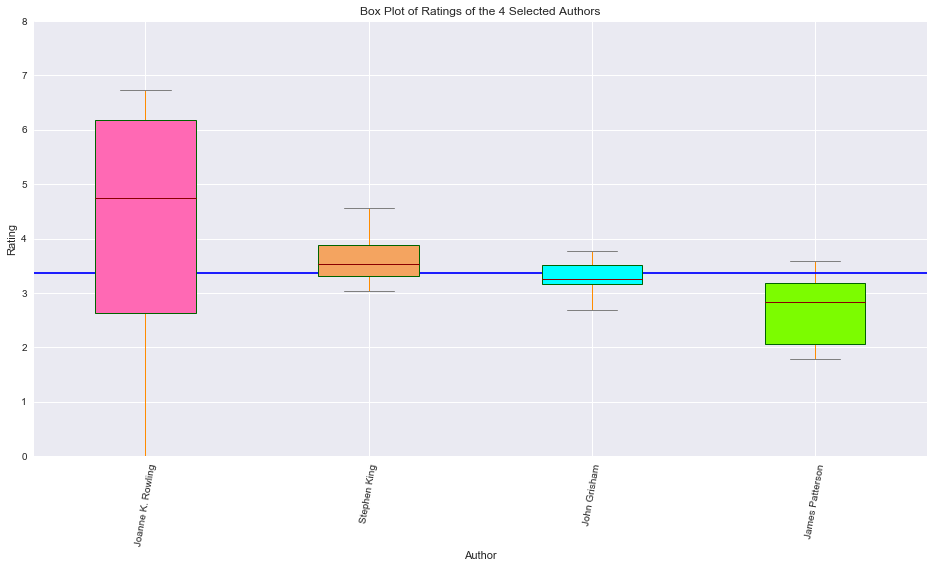

In [527]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=Titles_Selected_Authors.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot of Ratings of the 4 Selected Authors',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,8]);
ax.set_ylabel('Rating');
ax.set_xlabel('Author');
plt.axhline(Media_Rating.BookRating,color='blue')

colors = ['hotpink', 'sandybrown', 'aqua', 'lawngreen']
    
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)